In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [ ]:
df.shape

(4981, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
df['age'] = df['age'].apply(lambda x: np.nan if x <= 10 else x)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: np.nan if x <=70 else x)

In [ ]:
df.isnull().sum()

gender                 0
age                  493
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level    735
bmi                    0
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(3837, 11)

In [ ]:
df.drop(columns=['id'],inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [ ]:
df['smoking_status'].value_counts()

2    1560
0     870
1     741
3     666
Name: smoking_status, dtype: int64

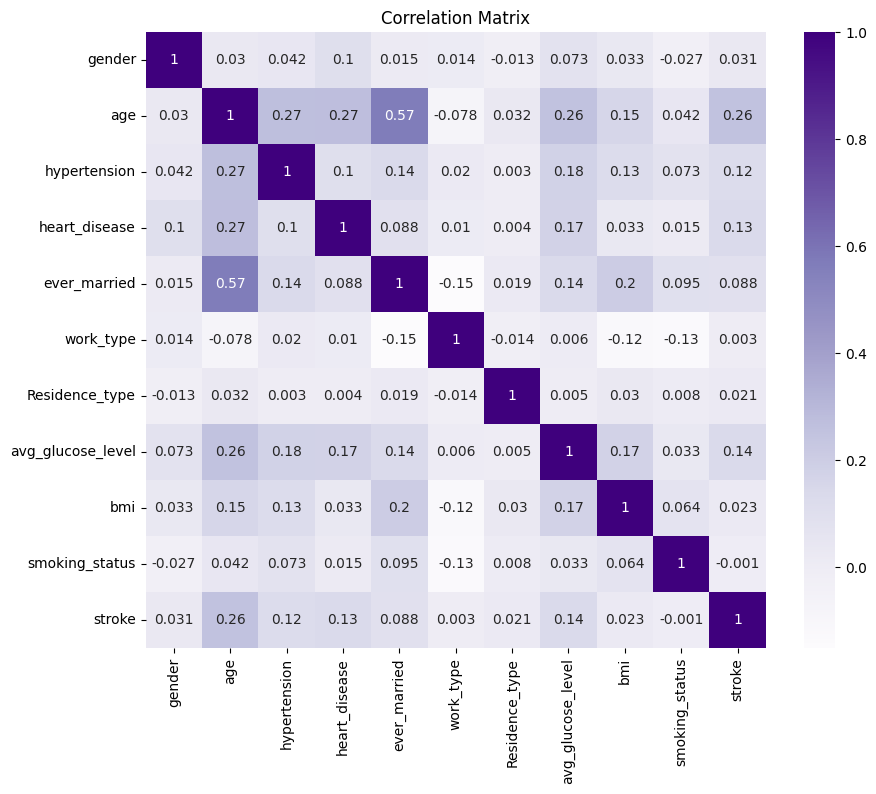

In [ ]:
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(df.corr().round(3), cmap="Purples", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.drop(columns=['smoking_status'],inplace=True)
df.drop(columns=['work_type'],inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,0,105.92,32.5,1
2,0,49.0,0,0,1,1,171.23,34.4,1
3,0,79.0,1,0,1,0,174.12,24.0,1
4,1,81.0,0,0,1,1,186.21,29.0,1


In [ ]:
df['stroke'].value_counts()

0    3617
1     220
Name: stroke, dtype: int64

In [ ]:
from sklearn.utils import resample

#Separate majority and minority classes
majority_class = df[df['stroke'] == 0]
minority_class = df[df['stroke'] == 1]

# Upsample minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Check the class distribution
print(balanced_df['stroke'].value_counts())


0    3617
1    3617
Name: stroke, dtype: int64


In [ ]:
X=balanced_df.drop(columns=['stroke'])
y=balanced_df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=15)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,rf_pred))

Accuracy: 0.9792674498963373


In [ ]:
confusion_matrix(y_test,rf_pred)

array([[695,  30],
       [  0, 722]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       725
           1       0.96      1.00      0.98       722

    accuracy                           0.98      1447
   macro avg       0.98      0.98      0.98      1447
weighted avg       0.98      0.98      0.98      1447



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,rf_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,rf_pred))

Mean squared error: 0.14398802069499653
Mean absolute error: 0.02073255010366275


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_pred=ada.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,ada_pred))

Accuracy: 0.796821008984105


In [ ]:
confusion_matrix(y_test,ada_pred)

array([[516, 209],
       [ 85, 637]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       725
           1       0.75      0.88      0.81       722

    accuracy                           0.80      1447
   macro avg       0.81      0.80      0.80      1447
weighted avg       0.81      0.80      0.80      1447



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,ada_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,ada_pred))

Mean squared error: 0.4507538031075223
Mean absolute error: 0.20317899101589496


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred=gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,gb_pred))

Accuracy: 0.8451969592259848


In [ ]:
confusion_matrix(y_test,gb_pred)

array([[550, 175],
       [ 49, 673]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       725
           1       0.79      0.93      0.86       722

    accuracy                           0.85      1447
   macro avg       0.86      0.85      0.84      1447
weighted avg       0.86      0.85      0.84      1447



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,gb_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,gb_pred))

Mean squared error: 0.39345017571989366
Mean absolute error: 0.15480304077401522


#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




# Create base classifiers
lr_classifier = LogisticRegression(max_iter=10000)
svm_classifier = SVC(probability=True)  # Set probability=True for soft voting
knn_classifier = KNeighborsClassifier(n_neighbors=15)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier with the base classifiers
bagging_lr = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=42)
bagging_nb = BaggingClassifier(estimator=nb_classifier, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifiers on the training data
bagging_lr.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)

# Make predictions using the Bagging Classifiers
y_pred_lr = bagging_lr.predict(X_test)
y_pred_svm = bagging_svm.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)
y_pred_nb = bagging_nb.predict(X_test)
y_pred_dt = bagging_dt.predict(X_test)

# Calculate and print accuracy scores for each Bagging Classifier

print("Bagging Logistic Regression Score:",accuracy_score(y_test, y_pred_lr))
print("Bagging SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Bagging K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Bagging Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Bagging Decision Tree Score:", accuracy_score(y_test, y_pred_dt))

lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Bagging Logistic Regression Score: 0.7525915687629579
Bagging SVM Score: 0.7429163787145819
Bagging K-Nearest Neighbors Score: 0.8534899792674498
Bagging Naive Bayes Score: 0.7290946786454734
Bagging Decision Tree Score: 0.9813407049067036
Maximum Accuracy: 0.9813407049067036


In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[698,  27],
       [  0, 722]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       725
           1       0.96      1.00      0.98       722

    accuracy                           0.98      1447
   macro avg       0.98      0.98      0.98      1447
weighted avg       0.98      0.98      0.98      1447



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_dt,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_dt))

Mean squared error: 0.13659903035269494
Mean absolute error: 0.018659295093296474


# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())

]

# Define the meta-classifier (you can choose any classifier)
#meta_classifier = GaussianNB()

# Create the stacking classifier
stacking_classifier_lr = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))
stacking_classifier_svm = StackingClassifier(estimators=base_classifiers, final_estimator=SVC(probability=True))
stacking_classifier_knn = StackingClassifier(estimators=base_classifiers, final_estimator=KNeighborsClassifier(n_neighbors=15))
stacking_classifier_nb = StackingClassifier(estimators=base_classifiers, final_estimator=GaussianNB())
stacking_classifier_dt = StackingClassifier(estimators=base_classifiers, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier on the training data
stacking_classifier_lr.fit(X_train, y_train)
stacking_classifier_svm.fit(X_train, y_train)
stacking_classifier_knn.fit(X_train, y_train)
stacking_classifier_nb.fit(X_train, y_train)
stacking_classifier_dt.fit(X_train, y_train)

# Make predictions on the test data
#stacking_predictions = stacking_classifier.predict(X_test)
y_pred_lr = stacking_classifier_lr.predict(X_test)
y_pred_svm = stacking_classifier_svm.predict(X_test)
y_pred_knn = stacking_classifier_knn.predict(X_test)
y_pred_nb = stacking_classifier_nb.predict(X_test)
y_pred_dt = stacking_classifier_dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print("Stacking Logistic Regression Score:", accuracy_score(y_test, y_pred_lr))
print("Stacking SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Stacking K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Stacking Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Stacking Decision Tree Score:", accuracy_score(y_test, y_pred_dt))
lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Stacking Logistic Regression Score: 0.9709744298548721
Stacking SVM Score: 0.9682100898410505
Stacking K-Nearest Neighbors Score: 0.9702833448514168
Stacking Naive Bayes Score: 0.9654457498272287
Stacking Decision Tree Score: 0.9260539046302695
Maximum Accuracy: 0.9709744298548721


In [ ]:
confusion_matrix(y_test,y_pred_lr)

array([[683,  42],
       [  0, 722]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       725
           1       0.95      1.00      0.97       722

    accuracy                           0.97      1447
   macro avg       0.97      0.97      0.97      1447
weighted avg       0.97      0.97      0.97      1447



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_lr,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_lr))

Mean squared error: 0.17036892364843964
Mean absolute error: 0.02902557014512785


##Deep Learning

In [ ]:
from sklearn.neural_network import MLPClassifier
dl=MLPClassifier()
dl.fit(X_train, y_train)

MLPClassifier()

In [ ]:
dl_pred = dl.predict(X_test)
print("Accuracy:",accuracy_score(y_test,dl_pred))

Accuracy: 0.7712508638562543


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, dl_pred)

0.7712508638562543

In [ ]:
confusion_matrix(y_test, dl_pred)

array([[495, 230],
       [101, 621]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, dl_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test, dl_pred))

Mean squared error: 0.47827725865207693
Mean absolute error: 0.22874913614374567


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,0,105.92,32.5,1
2,0,49.0,0,0,1,1,171.23,34.4,1
3,0,79.0,1,0,1,0,174.12,24.0,1
4,1,81.0,0,0,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,0,70.15,29.8,0
4977,1,40.0,0,0,1,1,191.15,31.1,0
4978,0,45.0,1,0,1,0,95.02,31.8,0
4979,1,40.0,0,0,1,0,83.94,30.0,0


In [ ]:
import pickle
pickle.dump(bagging_dt,open('stroke_prediction.pkl','wb'))

In [ ]:
model=pickle.load(open('stroke_prediction.pkl','rb'))

In [ ]:
model.predict((np.array([1,67.0,0,1,1,1,228.69,36.6]).reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict((np.array([1,81.0,0,0,1,1,186.21,29.0]).reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.predict((np.array([0,80.0,1,0,1,1,83.75,29.1]).reshape(1,-1)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([0])